<a href="https://colab.research.google.com/github/kavita200496/News-Headlines-Classification/blob/master/News_Headlines_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline 
from sklearn import metrics
import itertools
%matplotlib inline

In [ ]:
data = pd.read_csv('uci-news-aggregator.csv')

In [ ]:
data.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [ ]:
data["CATEGORY"].value_counts()

e    152469
b    115967
t    108344
m     45639
Name: CATEGORY, dtype: int64

In [ ]:
names = ['Entertainment', 'Business', 'Science and Technology', 'Health']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7e31dd358>],
      dtype=object)

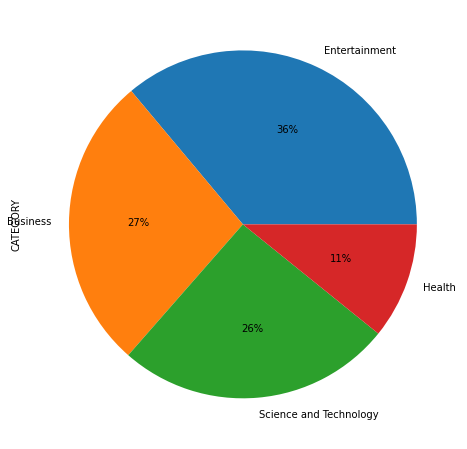

In [ ]:
data["CATEGORY"].value_counts().plot(kind='pie', labels=names, autopct='%1.0f%%', subplots=True, figsize=(8, 8))


Preparing the data to be fed into the model We will split the original data into the training and testing sets using the train_test_split() function. We want a training size of 70% of the entire data.

In [ ]:
X=data["TITLE"]
y=data["CATEGORY"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Calculating the number of rows in our train set
len(y_train)

295693

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7e31ad6d8>],
      dtype=object)

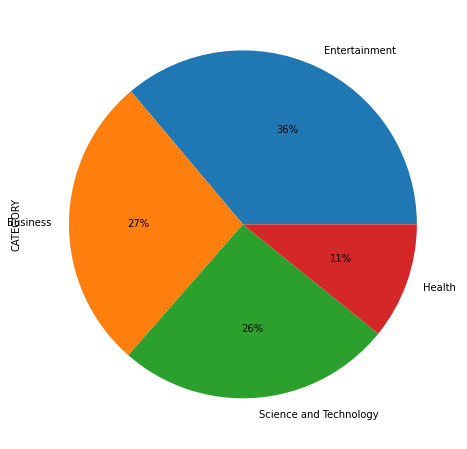

In [ ]:
y_train.value_counts().plot(kind='pie', labels=names, autopct='%1.0f%%', subplots=True, figsize=(8, 8))


We see that the training set has the same distribution as the original data and that’s what we wanted.

Training the Multinomial Naive Bayes Classifier In order to train and test the classifier, the first step should be to tokenize and count the number of occurrence of each word that appear in the headlines.

We use the CountVectorizer() for that. Each term is assigned a unique integer index.

Then the counters are transformed to a TF-IDF representation using TfidfTransformer().

The last step creates the Multinomial Naive Bayes classifier.

In order to make the training process easier, scikit-learn provides a Pipeline class that behaves like a compound classifier.

In [ ]:
text_clf = Pipeline([('vect', CountVectorizer()),
                         ('tfidf', TfidfTransformer()),
                         ('clf', MultinomialNB()),
                         ])

In [ ]:
text_clf = text_clf.fit(X_train, y_train)
predicted1 = text_clf.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, predicted1)

0.9227309313006012

In [ ]:
print(metrics.classification_report(y_test, predicted1, target_names=sorted(names)))

                        precision    recall  f1-score   support

              Business       0.89      0.91      0.90     34868
         Entertainment       0.95      0.97      0.96     45630
                Health       0.97      0.84      0.90     13658
Science and Technology       0.90      0.90      0.90     32570

              accuracy                           0.92    126726
             macro avg       0.93      0.91      0.92    126726
          weighted avg       0.92      0.92      0.92    126726



We can see that the metrics (precision, recall and f1-score) on an average give us 0.92, the results for category e (entertainment) are even better.

The overall accuracy of classification is 92%